In [1]:
library(caret)
library(e1071)
library(ROCR)

Loading required package: ggplot2
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [2]:
hr_data<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\final\\HR_balanced.csv')

str(hr_data)

'data.frame':	7570 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : Factor w/ 2 levels "Accident","No accident": 2 2 2 2 2 2 2 2 2 2 ...
 $ promotion_last_5years: Factor w/ 2 levels "No promotion",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...
 $ left                 : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
table(hr_data$left) ## Cool almost balanced dataset


  No  Yes 
3999 3571 

In [4]:
set.seed(42)
ind<-createDataPartition(hr_data$left,p = 0.7,list=F)

In [5]:
hr_train<-hr_data[ind,]
hr_test<-hr_data[-ind,]

In [6]:
mod1<-naiveBayes(left~.,data = hr_train,laplace = 1)

In [7]:
names(mod1)

[1] "apriori" "tables"  "levels"  "call"

In [8]:
mod1$apriori

Y
  No  Yes 
2800 2500 

In [9]:
mod1$tables

$satisfaction_level
     satisfaction_level
Y          [,1]      [,2]
  No  0.6667464 0.2156077
  Yes 0.4439000 0.2631521

$last_evaluation
     last_evaluation
Y          [,1]      [,2]
  No  0.7151964 0.1629146
  Yes 0.7155080 0.1973135

$number_project
     number_project
Y         [,1]      [,2]
  No  3.802857 0.9906994
  Yes 3.824000 1.8145912

$average_montly_hours
     average_montly_hours
Y         [,1]     [,2]
  No  199.6579 46.16618
  Yes 206.1552 60.90386

$time_spend_company
     time_spend_company
Y       [,1]      [,2]
  No  3.3800 1.5770867
  Yes 3.8696 0.9843696

$Work_accident
     Work_accident
Y       Accident No accident
  No  0.16916488  0.83083512
  Yes 0.04996003  0.95003997

$promotion_last_5years
     promotion_last_5years
Y     No promotion   Promotion
  No   0.966095646 0.033904354
  Yes  0.992406075 0.007593925

$sales
     sales
Y     accounting         hr         IT management  marketing product_mng
  No  0.04946619 0.04768683 0.08113879 0.04875445 0.0619

In [10]:
mod1$levels

[1] "No"  "Yes"

In [11]:
mod1$call

naiveBayes.default(x = X, y = Y, laplace = laplace)

In [12]:
mod1$tables$satisfaction_level  

No,0.6667464,0.2156077
Yes,0.4439000,0.2631521


In [13]:
mean(hr_train$satisfaction_level[hr_train$left=='No'])
sd(hr_train$satisfaction_level[hr_train$left=='No'])

[1] 0.6667464

[1] 0.2156077

In [14]:
pred_test<-predict(mod1,newdata = hr_test)

In [15]:
confusionMatrix(pred_test,hr_test$left,positive = 'Yes')

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1001  292
       Yes  198  779
                                          
               Accuracy : 0.7841          
                 95% CI : (0.7666, 0.8009)
    No Information Rate : 0.5282          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5649          
 Mcnemar's Test P-Value : 2.654e-05       
                                          
            Sensitivity : 0.7274          
            Specificity : 0.8349          
         Pos Pred Value : 0.7973          
         Neg Pred Value : 0.7742          
             Prevalence : 0.4718          
         Detection Rate : 0.3432          
   Detection Prevalence : 0.4304          
      Balanced Accuracy : 0.7811          
                                          
       'Positive' Class : Yes             
                                          

In [16]:
pred_test_prob<-predict(mod1,newdata = hr_test,type = 'raw')

In [17]:
head(pred_test_prob)

No,Yes
0.002087077,0.9979129
0.176484289,0.8235157
0.180370881,0.8196291
0.156194775,0.8438052
0.832755617,0.1672444
0.007560208,0.9924398


In [18]:
p_test<-prediction(pred_test_prob[,2],hr_test$left)

In [19]:
perf<-performance(p_test,'tpr','fpr')

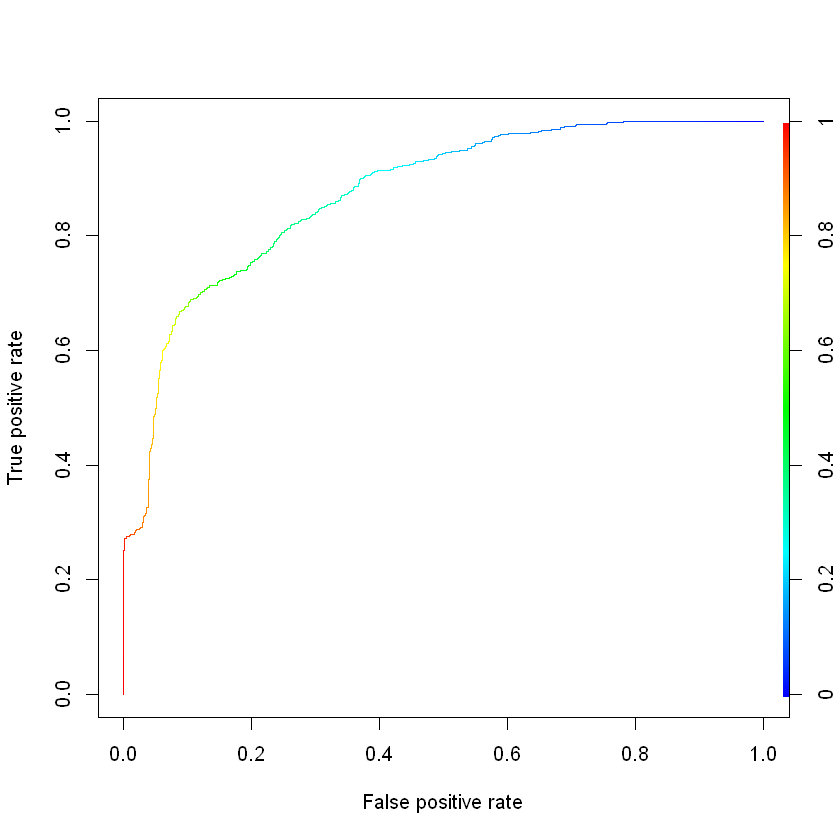

In [20]:
plot(perf,colorize=T)

In [22]:
performance(p_test,'auc')@y.values

[[1]]
[1] 0.8737269